In [85]:
# Set a working directory
#!pip install GitPython
import git
import os

repo = git.Repo('.', search_parent_directories=True)


os.chdir(repo.working_tree_dir)

In [86]:
%run 'cross_validation/functions.ipynb'

In [87]:
pico_df, labels_picoo, features_pico, feature_list_pico = preprocess_single_population(covari_pico, drop, None)
train_features, test_features, train_labels, test_labels = k_fold(features_pico, labels_pico, 8)

In [88]:
hyperparameters = {'n_estimators': 160, 'max_depth': 12, 'max_features': 'sqrt'}

In [89]:
predict_cruise(hyperparameters, 'pico')

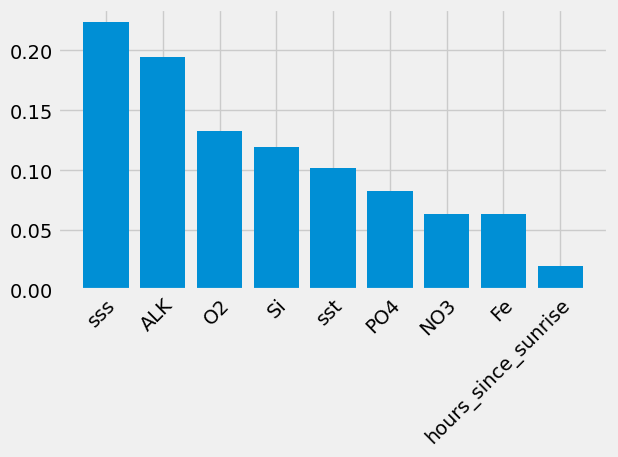

In [90]:
feature_importance('pico',feature_list_pico)

In [91]:
predictions, maes, rmses, old_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'pico')

In [92]:
drop = True
pico_df, labels_pico, features_pico, feature_list_pico = preprocess_single_population(covari_pico, drop, ['NO3', 'Fe', 'sst', 'PO4', 'hours_since_sunrise'])
train_features, test_features, train_labels, test_labels = k_fold(features_pico, labels_pico, 8)
predict_cruise(hyperparameters, 'pico')

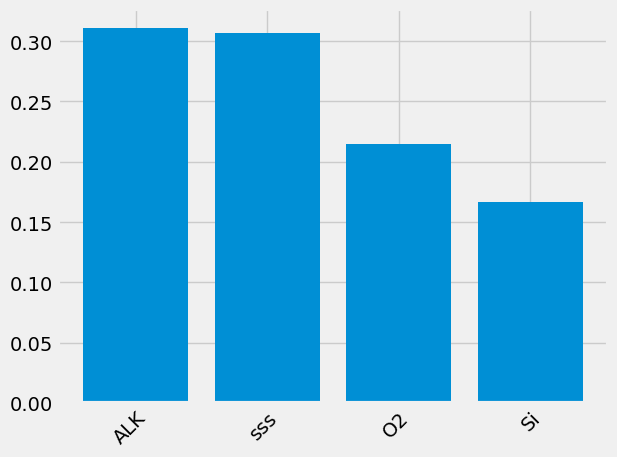

In [93]:
feature_importance('pico',feature_list_pico)

In [94]:
predictions, maes, rmses, more_nutrients_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'pico')

In [95]:
list_of_rmse = {'original': old_rmse}
list_of_rmse['max'] = more_nutrients_rmse
sorted_rmse = dict(sorted(list_of_rmse.items(), key=lambda item: item[1]))
print(sorted_rmse)
print('the percent improvement is:', (sorted_rmse['original'] - sorted_rmse['max'])/sorted_rmse['original'] * 100, '%' )

{'original': 11.421596578284516, 'max': 11.866005189603072}
the percent improvement is: -3.890949993484225 %


In [96]:
pico_df, labels_pico, features_pico, feature_list_pico = preprocess_single_population(covari_pico, drop, ['hours_since_sunrise'])
train_features, test_features, train_labels, test_labels = k_fold(features_pico, labels_pico, 8)
predict_cruise(hyperparameters, 'pico')

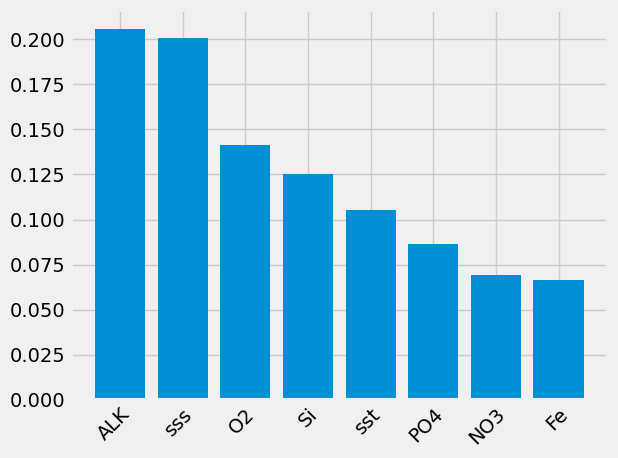

In [97]:
feature_importance('pico',feature_list_pico)

In [98]:
predictions, maes, rmses, sunrise_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'pico')

In [99]:
list_of_rmse['sunrise'] = sunrise_rmse
sorted_rmse = dict(sorted(list_of_rmse.items(), key=lambda item: item[1]))
print(sorted_rmse)
print('the percent improvement is:', (sorted_rmse['original'] - sorted_rmse['sunrise'])/sorted_rmse['original'] * 100, '%' )

{'sunrise': 10.848471175799812, 'original': 11.421596578284516, 'max': 11.866005189603072}
the percent improvement is: 5.017909699020255 %


In [100]:
hyperparameters={'n_estimators': 200, 'max_depth': 12, 'max_features': 'sqrt'}
predict_cruise(hyperparameters, 'pico')

In [101]:
hyperparameters={'n_estimators': 40, 'max_depth': 4, 'max_features': 'sqrt'}
predict_cruise(hyperparameters, 'pico')

In [102]:
hyperparameters={'n_estimators': 40, 'max_depth': 40, 'max_features': 'sqrt'}
predict_cruise(hyperparameters, 'pico')

In [103]:
hyperparameters={'n_estimators': 120, 'max_depth': 30, 'max_features': 'sqrt'}
predict_cruise(hyperparameters, 'pico')

In [104]:
drop = False
pico_df, labels_pico, features_pico, feature_list_pico = preprocess_single_population(covari_pico, drop, None)

param_grid = {
        'n_estimators': [60, 80, 120, 180],
        'max_depth': [6, 8, 12, 18],
        'max_features': ['sqrt']
    }

metrics = ['neg_root_mean_squared_error', 'r2', 'explained_variance']
# neg root mean squared error is the same as root mean squared error, but since the function chooses the best score we need to use the negative 

grid_search_hyperparams(param_grid, metrics, features_pico, labels_pico)

Fitting 8 folds for each of 16 candidates, totalling 128 fits
Best hyperparameters for  neg_root_mean_squared_error are: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 60}
Fitting 8 folds for each of 16 candidates, totalling 128 fits
Best hyperparameters for  r2 are: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 60}
Fitting 8 folds for each of 16 candidates, totalling 128 fits
Best hyperparameters for  explained_variance are: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 180}
